# Dados IBGE
## Bahia

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [8]:
dadosBA = pd.read_csv("C:\\GESAD\\Inputs\\IBGE_BA.csv")
dadosBA.head()

,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2022],...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,Abaíra,2900108,abairense,EDVAL LUZ SILVA,538.677,7301,13.55,97.2,0.603,18.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abaré,2900207,abareense,FERNANDO JOSE TEIXEIRA TOLENTINO,1604.923,17639,10.99,96.5,0.575,7.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acajutiba,2900306,acajutibense,ALEXSANDRO MENEZES DE FREITAS,181.475,13795,76.02,98.0,0.582,12.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adustina,2900355,adustinense,PAULO SERGIO OLIVEIRA DOS SANTOS,629.099,14201,22.57,98.1,0.546,20.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Água Fria,2900405,água-friense,RENAN ARAUJO BARROS,742.775,14497,19.52,97.0,0.550,13.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Contingente populacional
populacao = pd.DataFrame()
populacao['Município'] = ()
populacao['Código'] = ()
populacao['0 a 10'] = ()
populacao['10 a 20'] = ()
populacao['20 a 50'] = ()
populacao['50 a 100'] = ()
populacao['100 a 500'] = ()
populacao['500+'] = ()

populacao['Município'] = (dadosBA['Município [-]'])
populacao['Código'] = (dadosBA['Código [-]'])

for i in range(len(dadosBA['População residente - pessoas [2022]'])):
    if 0<dadosBA['População residente - pessoas [2022]'][i]<10000:
        populacao.loc[i, '0 a 10'] = dadosBA['População residente - pessoas [2022]'][i]
    if 10000<dadosBA['População residente - pessoas [2022]'][i]<20000:
        populacao.loc[i, '10 a 20'] = dadosBA['População residente - pessoas [2022]'][i]
    if 20000<dadosBA['População residente - pessoas [2022]'][i]<50000:
        populacao.loc[i, '20 a 50'] = dadosBA['População residente - pessoas [2022]'][i]
    if 50000<dadosBA['População residente - pessoas [2022]'][i]<100000:
        populacao.loc[i, '50 a 100'] = dadosBA['População residente - pessoas [2022]'][i]
    if 100000<dadosBA['População residente - pessoas [2022]'][i]<500000:
        populacao.loc[i, '100 a 500'] = dadosBA['População residente - pessoas [2022]'][i]
    if dadosBA['População residente - pessoas [2022]'][i]>500000:
        populacao.loc[i, '500+'] = dadosBA['População residente - pessoas [2022]'][i]

populacao

,Município,Código,0 a 10,10 a 20,20 a 50,50 a 100,100 a 500,500+
0,Abaíra,2900108,7301.0,NaN,NaN,NaN,NaN,NaN
1,Abaré,2900207,NaN,17639.0,NaN,NaN,NaN,NaN
2,Acajutiba,2900306,NaN,13795.0,NaN,NaN,NaN,NaN
3,Adustina,2900355,NaN,14201.0,NaN,NaN,NaN,NaN
4,Água Fria,2900405,NaN,14497.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
412,Vitória da Conquista,2933307,NaN,NaN,NaN,NaN,370879.0,NaN
413,Wagner,2933406,9503.0,NaN,NaN,NaN,NaN,NaN
414,Wanderley,2933455,NaN,12968.0,NaN,NaN,NaN,NaN
415,Wenceslau Guimarães,2933505,NaN,NaN,24474.0,NaN,NaN,NaN


In [10]:
# Quantidade de municípios em cada coluna
cols_numericas = populacao.select_dtypes(np.float64).columns
aux = np.sum(~np.isnan(populacao[cols_numericas]), axis=0)
titulos_colunas = populacao.columns.tolist()
titulos_colunas.pop(0)
titulos_colunas.pop(0)
aux

0 a 10        76
10 a 20      181
20 a 50      118
50 a 100      24
100 a 500     16
500+           2
dtype: int64

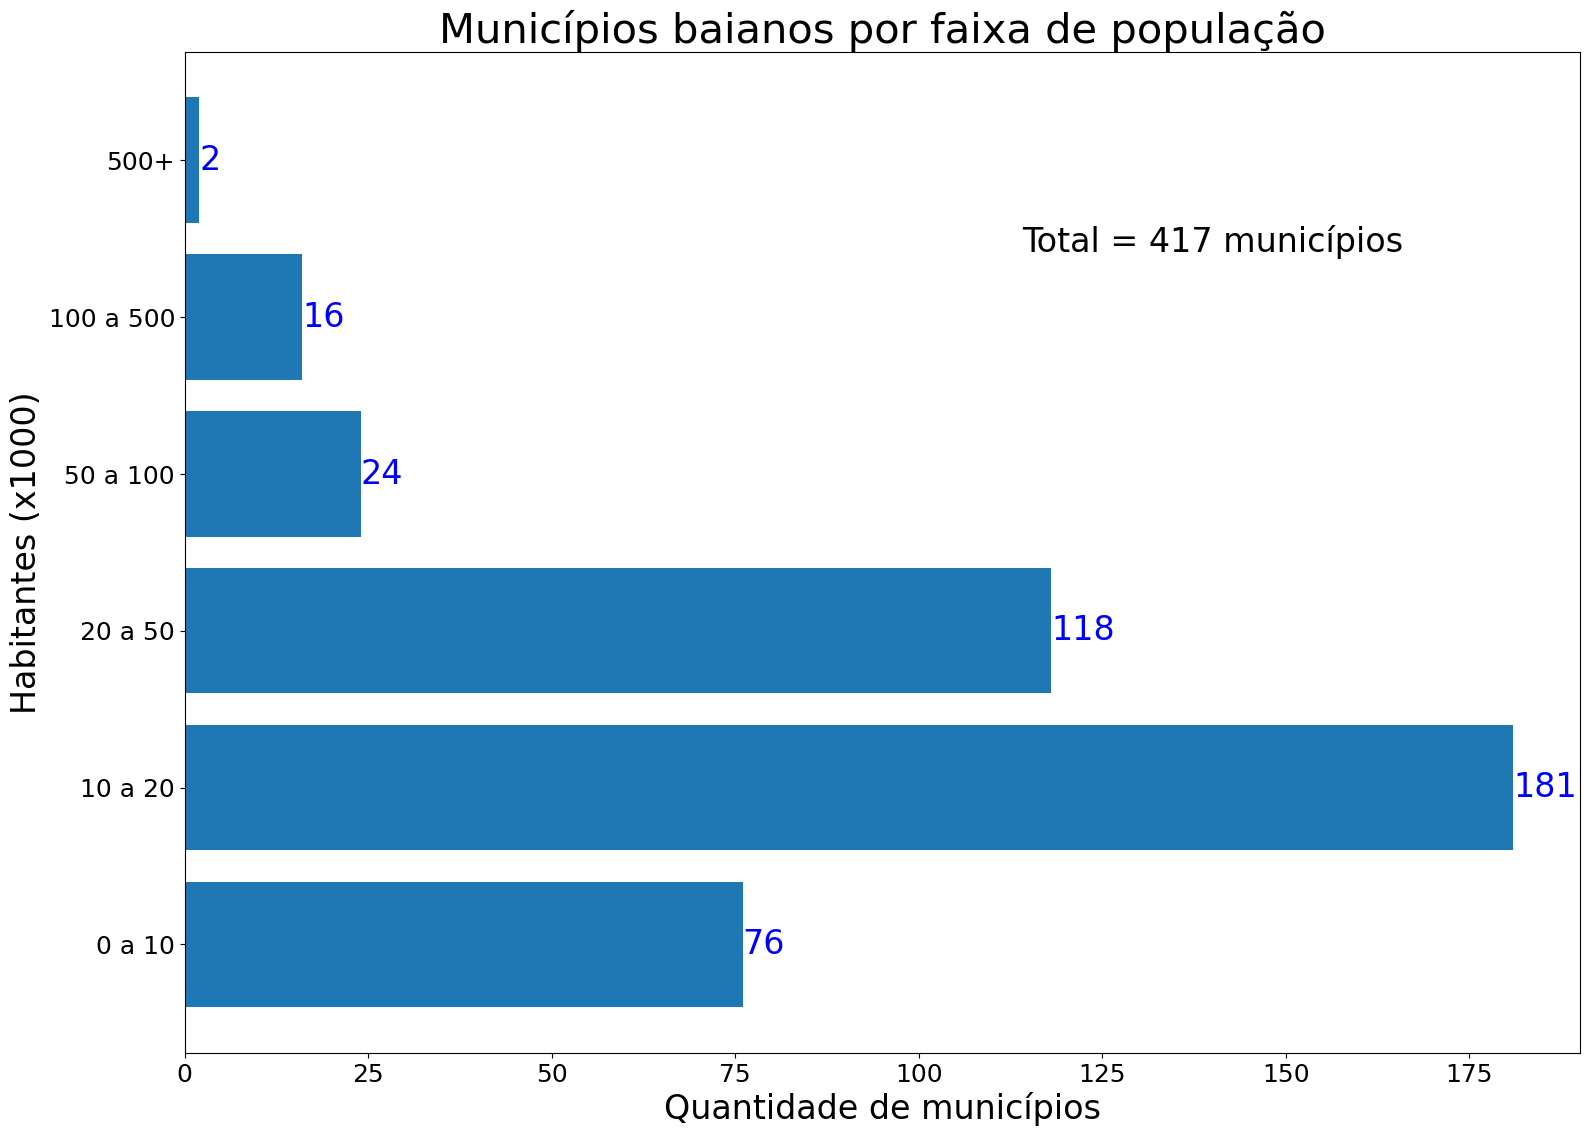

In [12]:
# Gráfico
fig, ax = plt.subplots(figsize=(18, 13))
ax.barh(titulos_colunas, aux) 
# Adicionando os valores no topo das barras
for i, v in enumerate(aux):
    ax.text(v, i, str(v), color='blue', va='center', fontsize=24)

plt.xlabel('Quantidade de municípios', fontsize=24)
plt.ylabel('Habitantes (x1000)', fontsize=24)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.title('Municípios baianos por faixa de população', fontsize=30)
plt.text(0.6, 0.8, 'Total = 417 municípios', fontsize=24, transform=plt.gca().transAxes)
plt.savefig('BA.png')
plt.show() 

In [13]:
# Identificando os municípios que têm até 20 mil habitantes 
aux = np.isnan(populacao[cols_numericas])
cols = ('0 a 10', '10 a 20')
QtdMunicipios = 0
dicionario = {}
for j in range(len(cols)):
    for i in range(len(aux[cols[j]])):
        if aux[cols[j]][i]==False:
            dicionario[populacao['Código'][i]] = populacao[cols[j]][i] 
            QtdMunicipios = QtdMunicipios+1

print((QtdMunicipios/417)*100, '%')

# Salvar dicionário em arquivo csv
with open('dictBA.csv', 'w', newline='') as arquivo_csv:
    writer = csv.DictWriter(arquivo_csv, fieldnames=dicionario.keys())
    writer.writeheader()
    writer.writerow(dicionario)

61.63069544364509 %


In [15]:
pop10 = populacao['0 a 10'].sum()
pop20 = populacao['10 a 20'].sum()
total = dadosBA['População residente - pessoas [2022]'].sum()  
print(pop10, pop20, total)
print(((pop10+pop20)/total)*100, '%') 

551741.0 2589106.0 14141626
22.20994247761891 %


In [16]:
dicionario

{2900108: 7301.0,
 2900603: 4447.0,
 2900900: 5218.0,
 2901957: 6913.0,
 2902203: 9833.0,
 2902302: 8677.0,
 2903102: 5775.0,
 2903300: 5833.0,
 2903953: 9730.0,
 2904407: 9108.0,
 2904803: 6205.0,
 2906402: 7772.0,
 2906899: 9940.0,
 2907004: 8365.0,
 2907400: 3434.0,
 2907558: 8841.0,
 2908804: 4333.0,
 2909000: 7546.0,
 2909505: 4415.0,
 2910206: 4407.0,
 2910305: 7808.0,
 2910776: 5631.0,
 2910909: 4873.0,
 2911253: 4360.0,
 2911501: 5555.0,
 2911659: 8050.0,
 2912608: 3725.0,
 2912806: 8896.0,
 2913309: 6190.0,
 2914109: 9935.0,
 2914208: 6101.0,
 2915304: 6347.0,
 2915403: 6037.0,
 2915700: 7051.0,
 2915908: 5914.0,
 2916302: 9174.0,
 2916708: 8153.0,
 2917359: 9275.0,
 2917904: 9285.0,
 2918456: 9655.0,
 2918555: 5888.0,
 2918605: 7379.0,
 2918704: 4075.0,
 2918902: 3845.0,
 2919009: 3527.0,
 2919058: 7494.0,
 2919108: 9015.0,
 2919900: 7256.0,
 2919959: 6973.0,
 2920007: 8731.0,
 2920304: 8670.0,
 2920809: 9267.0,
 2921609: 7996.0,
 2922201: 7190.0,
 2922730: 7967.0,
 2922755: 